## The Ising Model for Dummies

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm 
from matplotlib import colors 
import random as rand

In [67]:
class IsingModel:
    '''a class to investigate the properties of the ising model'''
    def __init__(self, grid_type = 'square', dim = 10, J=[1], pbcs = True, Jrule = 'nn', temp=1, no_vacancies = 0, h = 0):
        
        self.grid_type = grid_type 
        self.dim = dim
        self.pbcs = pbcs
        self.Jrule = Jrule #List of J values
        self.h = h #External Field
        
        self.neighbours = [] #List of neighbours
        
        #Below takes into account what type of grid it is and makes a list of nearest neighbours
        if Jrule == 'nn':
            if self.grid_type == 'BCC': #If you want a square lattice type square!
                self.BCC()
                self.num = 3
                
            if self.grid_type == 'square': #If you want a square lattice type square!
                self.create_square_grid()
                self.num = 2
                
            if self.grid_type == '1D': #If you want a 1D lattice 
                self.create_1D_grid()
                self.num =1

            if self.grid_type == 'triangular': #If you want a triangular lattice
                self.create_triangular_grid()

            if self.grid_type == '3D': #If you want to be fancy and go 3d
                self.num = 3
                self.create_three_grid()
            
            #I created this self.num parameter as there was a wee bit of trouble in the code later on when working with 1d and 3d
            #It made life simpler to just define this function
            if self.grid_type != '3D' and self.grid_type != '1D' and self.grid_type != 'BCC': 
                self.num = 2      
                
        if Jrule == 'nnn' and self.grid_type == 'square': #next nearest neighbours
            self.extra_neighbours()
            self.num = 2
            
        if Jrule == 'nnn' and self.grid_type == 'BCC': #next nearest neighbours
            self.BCC()
            self.num = 3
                
        #Random Initial Moments are calculated   
        self.init_moments = np.random.choice([-1, 1], self.X.shape) #Initial moments are calculated. They are randomised
        self.J = self.create_Jlist(J) #Creates list of J
        self.current_moments = np.copy(self.init_moments) 
        self.magnetisation = self.current_moments.flatten().sum() #Calculates the magnetisation of the whole lattice
        self.maglist = [] #List for average magnetisation per site (will be used over range of temperatures)
        self.maglist.append(abs(self.magnetisation)/self.num_sites) #Calculates average magnetisation per site
        self.energy_list = []
        print(self.current_moments)
        self.current_energy =  self.grid_energy(self.current_moments) #Calculates the energy of the lattice
        self.energy_list.append(self.current_energy/self.num_sites) #Calculates the average energy per lattice site
        
        self.temp = temp #Temperature at which the Ising Model is investigated
       
    def reset(self):
        '''Resets the lattice, randomly giving each point a spin'''
        self.current_moments = np.random.choice([-1, 1], self.Y.shape)

    def extra_neighbours(self):
        '''Gives each point an additional neareat neighbours four neighbours'''
        x, y = np.linspace(0, self.dim-1, self.dim), np.linspace(0, self.dim-1, self.dim)
        X, Y = np.meshgrid(y, x)
        self.X, self.Y = X.flatten(), Y.flatten()
        self.num_sites = self.dim*self.dim
        
        for i, (x1, x2) in enumerate(zip(self.X, self.Y)):
        
            if self.pbcs == True:
                    templist = [[int((x1 - 1) % self.dim), x2] , 
                                [int((x1 + 1) % self.dim), x2] ,
                                [x1, int((x2 - 1) % self.dim) ], 
                                [x1, int((x2 + 1) % self.dim)], 
                                [int((x1 - 1) % self.dim), int((x2 - 1) % self.dim)] ,
                                [int((x1 + 1) % self.dim), int((x2 + 1) % self.dim)] , 
                                [int((x1 + 1) % self.dim),int((x2 - 1) % self.dim) ], 
                                [int((x1 - 1) % self.dim), int((x2 + 1)%(self.dim))] ]
                    #print(templist)
                    reallist = [int(a[1]*self.dim + a[0]) for a in templist] #indices of nearest neighbour
                    self.neighbours.append(reallist)
                    
    def create_1D_grid(self):
        '''Creates a square grid, which will then be used for the lattice investigated'''
        self.X = np.linspace(0, self.dim-1, self.dim)
        self.Y = np.zeros_like(self.X)
        self.num_sites = self.dim
        
        for i, (x1) in enumerate((self.X)):
            if self.pbcs == True:
                templist = [int((x1 - 1) % self.dim), int((x1 + 1) % self.dim) ]
                self.neighbours.append(templist)
                
    def BCC(self):
        '''creates a three dimensional lattice square lattice, also known as the simple cubic lattice'''
        x, y, z = np.linspace(0, (self.dim)-1, self.dim), np.linspace(0, (self.dim)-1, self.dim), np.linspace(0, (self.dim)-1, self.dim)
        X, Y, Z = np.meshgrid(y, x, z)
        self.X, self.Y, self.Z = X.flatten(), Y.flatten(), Z.flatten()
        self.num_sites = self.dim*self.dim*self.dim
        
        if self.Jrule == 'nn':
        
            for i, (x1, x2, x3) in enumerate(zip(self.X, self.Y, self.Z)):
                if self.pbcs == True:
                    templist = [[x1, x2, int((x3 - 1) % self.dim)] ,  #say atom on x1 plane
                                [x1, x2, int((x3 + 1) % self.dim)] , 
                                [x1, int((x2 + 1) % self.dim), int((x3 - 1) % self.dim)], 
                                [x1, int((x2 + 1) % self.dim), int((x3 + 1) % self.dim)],
                                [int((x1 + 1) % self.dim), x2, int((x3 - 1) % self.dim)] ,  #say atom on x1 plane
                                [int((x1 + 1) % self.dim), x2, int((x3 + 1) % self.dim)] , 
                                [int((x1 + 1) % self.dim), int((x2 + 1) % self.dim), int((x3 - 1) % self.dim)], 
                                [int((x1 + 1) % self.dim), int((x2 + 1) % self.dim), int((x3 + 1) % self.dim)]]

                    reallist = [int(a[0]*self.dim + a[1]*self.dim**2 + a[2]) for a in templist] #indices of nearest neighbour

                    self.neighbours.append(reallist)
        
        if self.Jrule == 'nnn':
        
            for i, (x1, x2, x3) in enumerate(zip(self.X, self.Y, self.Z)):
                if self.pbcs == True:
                    templist = [[x1, x2, int((x3 - 1) % self.dim)] ,  #say atom on x1 plane
                                [x1, x2, int((x3 + 1) % self.dim)] , 
                                [x1, int((x2 + 1) % self.dim), int((x3 - 1) % self.dim)], 
                                [x1, int((x2 + 1) % self.dim), int((x3 + 1) % self.dim)],
                                [int((x1 + 1) % self.dim), x2, int((x3 - 1) % self.dim)] ,  #say atom on x1 plane
                                [int((x1 + 1) % self.dim), x2, int((x3 + 1) % self.dim)] , 
                                [int((x1 + 1) % self.dim), int((x2 + 1) % self.dim), int((x3 - 1) % self.dim)], 
                                [int((x1 + 1) % self.dim), int((x2 + 1) % self.dim), int((x3 + 1) % self.dim)], 
                                [x1, int((x2 + 1) % self.dim), x3], [x1, int((x2 - 1) % self.dim), x3], 
                                [int((x1 + 1) % self.dim), x2, x3], [int((x1 - 1) % self.dim), x2, x3]] 
                    #last four is next nearest neighbours

                    reallist = [int(a[0]*self.dim + a[1]*self.dim**2 + a[2]) for a in templist] #indices of nearest neighbour

                    self.neighbours.append(reallist)
        
    def create_square_grid(self):
        '''Creates a square grid, which will then be used for the lattice investigated. Non periodic boundary
        conditions can also be applied to the square grid lattice in this model'''
        x, y = np.linspace(0, self.dim-1, self.dim), np.linspace(0, self.dim-1, self.dim)
        X, Y = np.meshgrid(x, y)
        self.X, self.Y = X.flatten(), Y.flatten()
        self.num_sites = self.dim*self.dim
        
        for i, (x1, x2) in enumerate(zip(self.X, self.Y)):
            
            if self.pbcs == True:
                templist = [[int((x1 - 1) % self.dim), x2] , [int((x1 + 1) % self.dim), x2] , [x1,int((x2 - 1) % self.dim) ], 
                            [x1, int((x2 + 1) % self.dim)] ]
                reallist = [int(a[1]*self.dim + a[0]) for a in templist] 
                self.neighbours.append(reallist)
        
            elif self.pbcs == False: #This is when non periodic conditions are applied. Note that the number of neighbours is not equal
                templist = [[x1 - 1, x2] , [x1+1, x2] , [x1,x2-1], 
                            [x1, x2+1] ] #list of the nearest neighbours
                ar = []
                for a in templist:
                    
                    if a[0] >= 0 and a[1] >= 0 and a[0] < self.dim and a[1] < self.dim:
                        ar.append([a[0], a[1]])
                reallist = [int(c[1]*self.dim + c[0]) for c in ar]
                        
                self.neighbours.append(reallist)
                
            elif self.pbcs == 'Cylindrical':
                templist = [[int((x1 - 1) % self.dim), x2] , [int((x1 + 1) % self.dim), x2] , [x1,x2-1], 
                            [x1, x2+1] ] #list of the nearest neighbours
                ar = []
                for a in templist:
                    if a[1] >= 0 and a[1] < self.dim:
                        ar.append([a[0], a[1]])
                reallist = [int(c[1]*self.dim + c[0]) for c in ar]
                        
                self.neighbours.append(reallist)
                
    def create_triangular_grid(self):
        '''creates a triangular lattice, where each point has six nearest neighbours in the lattice'''
        x, y = np.linspace(0, self.dim-1, self.dim), np.linspace(0, self.dim-1, self.dim)
        X, Y = np.meshgrid(y, x)
        self.X, self.Y = X.flatten(), Y.flatten()
        self.num_sites = self.dim*self.dim
        
        for i, (x1, x2) in enumerate(zip(self.X, self.Y)):
            if self.pbcs == True:
                templist = [[int((x1 - 1) % self.dim), x2] , [int((x1 + 1) % self.dim), x2] , [x1,int((x2 - 1) % self.dim) ], 
                            [x1, int((x2 + 1) % self.dim)],[int((x1 + 1) % self.dim),int((x2 - 1) % self.dim) ], 
                            [int((x1 - 1) % self.dim), int((x2 + 1) % self.dim)] ]
                reallist = [int(a[1]*self.dim + a[0]) for a in templist] #indices of nearest neighbour
                
                self.neighbours.append(reallist)
                
    def create_three_grid(self):
        '''creates a three dimensional lattice square lattice, also known as the simple cubic lattice'''
        x, y, z = np.linspace(0, (self.dim)-1, self.dim), np.linspace(0, (self.dim)-1, self.dim), np.linspace(0, (self.dim)-1, self.dim)
        X, Y, Z = np.meshgrid(y, x, z)
        self.X, self.Y, self.Z = X.flatten(), Y.flatten(), Z.flatten()
        self.num_sites = self.dim*self.dim*self.dim
        
        for i, (x1, x2, x3) in enumerate(zip(self.X, self.Y, self.Z)):
            if self.pbcs == True:
                templist = [[x1, x2, int((x3 - 1) % self.dim)] , 
                            [x1, x2, int((x3 + 1) % self.dim)] , 
                            [int((x1 + 1) % self.dim),x2 , x3], 
                            [int((x1 - 1) % self.dim),x2 , x3],
                           [x1, int((x2 - 1) % self.dim),  x3] , 
                            [x1, int((x2 + 1) % self.dim), x3
                            ] ]
                
                reallist = [int(a[0]*self.dim + a[1]*self.dim**2 + a[2]) for a in templist] #indices of nearest neighbour
                
                self.neighbours.append(reallist)
                
                
    def grid_energy(self, moments): 
        energy = 0
        '''Returns scalar for total energy for a given lattice configuration'''
        momentlist = self.current_moments 
        for i in range((self.dim**self.num)): #Notice here how I am using self.num. When summing over the nieghbours for npbc it was helpful
            #print(self.J)
            energy += 0.5*momentlist[i]*np.sum(self.J[i]*momentlist[self.neighbours[i]]) 
            
            #+self.h*np.sum(momentlist) #Note here that an external magnetic field can be applied
        return energy
        
    def create_Jlist(self, J):
        '''This function creates a list of the J value to be used when calculating the energy at each point. Notes that 
        if there is more than one J value, this can only be done when the dimension of the lattice is even'''
        
        if len(J) ==1 and self.Jrule == 'nn': #if there is only one interaction energy
            return np.array([J[0] for i in range((self.dim**self.num))])
        '''else:
            jlist = np.zeros((self.dim, self.dim)); p = 0
            #Now we write a list that represents the J used for each point
            #Note this can only be done for even array
            #Here I applied a chess like interaction energy array. I could apply this to the next nearest neighbours
            for i in range(1, self.dim):
                if (i % 2 ==0):
                    jlist[i, 0] = J[0]
                    p = 1
                else:
                    jlist[i, 0] = J[1]
                    p = -1
                for j in range(1, self.dim):
                    if p == 1:
                        jlist[i,j] = J[1]
                    else:
                        jlist[i,j] = J[0]
                    p *=-1
            return jlist.flatten()'''
        
        if self.Jrule == 'nnn':
            if self.grid_type == 'square':
                '''First four will be 1, next four will be sqrt2 apart'''
                jlist = []
                #First create place for each point
                for i in range(self.dim*self.dim*self.dim): #each point
                    for j in range(4):
                        jlist.append(J[0]/np.sqrt(2))
                    for j in range(4):
                        jlist.append(J[0]/1)
                return jlist
            if self.grid_type == 'BCC':
                jlist = []
                #First create place for each point
                for i in range(self.dim*self.dim*self.dim): #each point
                    for j in range(8):
                        jlist.append(J[0]*np.sqrt(3)/2)
                    for j in range(4):
                        jlist.append(J[0]/1)
                return jlist
                
        #Please note: although this is not necessary, I still created this as I would have liked to look into how different interaction energies between points
        #can effect the curie temperature. Unfortunately I did not have enough time, but I would like to carry this out in the furture and this 
        #J list would then be important as it will tell me the interaction energy between each neighbour
       
    def update_single(self, temp):
        '''Update by going through every point in the lattice'''
        self.current_energy =  self.grid_energy(self.current_moments) #Gets current energy
        newE = self.current_energy #This newE will be updated throughout the loop
        if self.Jrule =='nn' or self.Jrule =='nnn': #Checks what the Jrule is
            for q in range(self.dim**self.num):
                neigh = self.current_moments[self.neighbours[q]]
                neighsum = np.sum(self.J[q]*self.current_moments[q]*neigh)
                deltaE = 2*neighsum + 2*self.h*self.current_moments[q] #energy for a given lattice site
                deltaM = 0 #change in magnetisation 
                #print(deltaE)
                if (deltaE <= 0):
                    newE += deltaE #update energy
                    self.current_moments[q] *= -1 #Flip
                    deltaM = 2*self.current_moments[q]
                else:
                    newE +=0
                    self.current_moments[q] = self.current_moments[q]
                    deltaM = 0

                if(deltaE>0): #Now it is defined according to boltzmann probability
                    random_num = float(rand.uniform(0, 1))
                    if (random_num < float(np.exp(-1*float(deltaE)/float(self.temp)))):
                        newE += deltaE #Update energy
                        self.current_moments[q] *= -1 #flip
                        deltaM = 2*self.current_moments[q] #change in magnetisation
                    else:
                        newE +=0
                        self.current_moments[q] = self.current_moments[q]
                        deltaM = 0

                self.magnetisation += deltaM #Update Magnetisation

        self.current_energy = newE #update energy

        self.energy_list.append(self.current_energy/self.num_sites) #average energy per site
        self.maglist.append(abs(self.magnetisation)/self.num_sites) #Absolute value used due to symmetry of hamiltonian
        
    def run(self, num_its=100, temp=-1): 
        '''Performs multiple updates for a given temperature'''
        self.temp = temp
        for it in range(num_its):
            self.update_single(temp = self.temp)
            
    def grid_figure(self):
        '''This prints the lattice for a given configuration'''
        fig = plt.figure(figsize=(6,5))
        left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
        ax = fig.add_axes([left, bottom, width, height]) 

        start, stop, n_values = 0, self.dim, self.dim

        x_vals = np.linspace(start, stop, n_values)
        y_vals = np.linspace(start, stop, n_values)
        X, Y = np.meshgrid(x_vals, y_vals)
        
        lattice = np.zeros((self.dim, self.dim))
        n = 0
        for i in range(self.dim):
            for j in range(self.dim):
                lattice[i, j] = self.current_moments[n]
                n +=1

        cp = plt.pcolormesh(X, Y, lattice)

        ax.set_title('100 x 100 Grid')
        plt.show()
        
    def print_equil(self, num_its= 300, temp = -1, to_print = 'all'):
        '''This runs the Ising Model and puts it into equilibrium and prints the average energy and magnetisation list'''
        self.run(temp = temp, num_its = num_its)
        
        if to_print == 'all' or to_print == 'energy':
            plt.plot(self.energy_list)
            plt.grid(linestyle= '-', linewidth=-.2)
            plt.ylabel('Number of Iterations')
            plt.xlabel('Average Energy')
            plt.show()
        
        if to_print == 'all' or to_print == 'magnetisation':
            plt.plot(self.maglist)
            plt.grid(linestyle= '-', linewidth=-.2)
            plt.ylabel('Number of Iterations')
            plt.xlabel('Average Energy')
            plt.show()
        
    def props_with_std(self, tempmin = 0.1, tempmax = 4, to_print = 'all'):
        '''This investigates the various properties of the Ising Model over a wide range of temperatures and prints the properties
        over a wide range of temperatures'''
        testruns, countruns = 100, 100
        self.run(temp = self.temp, num_its =3000)
        templist = np.linspace(tempmin,tempmax, 20) #Input range of temperatures here
        aveng, avmag, stdeng, stdmag = np.zeros(len(templist)), np.zeros(len(templist)), np.zeros(len(templist)), np.zeros(len(templist))
        heat_capacity, mag_suscept = np.zeros(20), np.zeros(20)
        list1, list2, list3, list4 = np.zeros((20, 20)), np.zeros((20, 20)), np.zeros((20, 20)), np.zeros((20, 20))
        for i, temp0 in enumerate(templist):
            for j in range(len(list1)):
                print(j, i)
                self.run(num_its = testruns + countruns, temp=temp0)
                aveng[i] = (np.mean(self.energy_list[-countruns:]))
                avmag[i] = (np.mean(self.maglist[-countruns:]))
                stdeng[i] =  (np.std(self.energy_list[-countruns:]))
                stdmag[i] = (np.std(self.maglist[-countruns:]))
    
                heat_capacity[i] = (stdeng[i]/(temp0**2))
                mag_suscept[i] = (stdmag[i]/(temp0))
                list1[i][j] = np.mean(self.energy_list[-countruns:]) #this repeats it many times and gets the list
                list2[i][j] = np.mean(self.maglist[-countruns:])
                list3[i][j] = heat_capacity[i] #Needed for magnetic susceptibility and heat capacity
                list4[i][j] = mag_suscept[i]
        
        stdE, stdM, stdH, stdS = [], [], [], []
        print(list1[0])
        for i in range(len(list1)):
            for j in range(len(list1)):
        
                if abs(list1[i][j] - list1[i][int((j - 1) % 20)]) > 0.2:
                    list1[i][j] = 0
                
        #now we have to get the standard deviation. Go through array and get each average for given ttemp
        #Now we have to create a list of each of the average of the averages
        for j in range(len(list1)):
            stdE.append(np.std(list1[j]))
            stdM.append(np.std(list2[j]))
            stdH.append(np.std(list3[j]))
            stdS.append(np.std(list4[j]))

        if to_print == 'all' or to_print =='magnetisation':
            plt.errorbar(templist[0:], avmag[0:], yerr = stdM,  marker='o', mfc='red', mec='green')
            plt.grid(linestyle= '-', linewidth=-.2)
    
            plt.xlabel('Temperature J/k')
            plt.show()

        if to_print == 'all' or to_print =='energy':
            #plt.plot(templist[0:], aveng[0:], 'ro')
            plt.errorbar(templist[0:], aveng[0:], yerr = stdE,  marker='o', mfc='red', mec='green')
            plt.grid(linestyle= '-', linewidth=-.2)
            plt.ylabel('Average Energy per Spin')
            plt.xlabel('Temperature J/k')
            plt.show()
            
        if to_print == 'all' or to_print =='heat capacity':
            plt.errorbar(templist[0:], heat_capacity[0:], yerr = stdH,  marker='o', mfc='red', mec='green')
            #plt.plot(templist[0:], heat_capacity[0:], 'ro')
            plt.grid(linestyle= '-', linewidth=-.2)
            plt.ylabel('Heat Capactity')
            plt.xlabel('Temperature J/k')
            plt.show()
            
        if to_print == 'all' or to_print =='magnetic susceptibility':
            #plt.plot(templist[0:], mag_suscept[0:], 'ro')
            plt.errorbar(templist[0:], mag_suscept[0:], yerr = stdS,  marker='o', mfc='red', mec='green', capthick = 2)
            plt.grid(linestyle= '-', linewidth=-.2)
            plt.ylabel('Magnetic Susceptibility')
            plt.xlabel('Temperature J/k')
            
            plt.show()
            
        return aveng, avmag,heat_capacity, mag_suscept
            
    def props(self, tempmin = 0.1, tempmax = 4, to_print = 'all'):
        '''This investigates the various properties of the Ising Model over a wide range of temperatures'''
        testruns, countruns = 100, 200
        templist = np.linspace(tempmin,tempmax, 20) #Input range of temperatures here
        aveng, avmag, stdeng, stdmag = np.zeros(len(templist)), np.zeros(len(templist)), np.zeros(len(templist)), np.zeros(len(templist))
        self.run(temp = self.temp, num_its =100)
        for i, temp0 in enumerate(templist):
            #self.reset()
            print(i)
            self.run(num_its = testruns + countruns, temp=temp0)
            aveng[i] = (np.mean(self.energy_list[-countruns:]))
            avmag[i] = (np.mean(self.maglist[-countruns:]))
            stdeng[i] =  (np.std(self.energy_list[-countruns:]))
            stdmag[i] = (np.std(self.maglist[-countruns:]))

        heat_capacity = stdeng/(templist**2)
        mag_suscept = stdmag/(templist)
        
        if to_print == 'all' or to_print =='energy':
            plt.plot(templist[0:], avmag[0:], 'ro')
            plt.grid(linestyle= '-', linewidth=-.2)
            plt.ylabel('Average Magnetisation per Spin')
            plt.xlabel('Temperature J/k')
            plt.show()

        if to_print == 'all' or to_print =='magnetisation':
            plt.plot(templist[0:], aveng[0:], 'ro')
            plt.grid(linestyle= '-', linewidth=-.2)
            plt.ylabel('Average Energy per Spin')
            plt.xlabel('Temperature J/k')
            plt.show()
            
        if to_print == 'all' or to_print =='heat capacity':
            plt.plot(templist[0:], heat_capacity[0:], 'ro')
            plt.grid(linestyle= '-', linewidth=-.2)
            plt.ylabel('Heat Capactity')
            plt.xlabel('Temperature J/k')
            plt.show()
            
        if to_print == 'all' or to_print =='magnetic susceptibility':
            plt.plot(templist[0:], mag_suscept[0:], 'ro')
            plt.grid(linestyle= '-', linewidth=-.2)
            plt.ylabel('Magnetic Susceptibility')
            plt.xlabel('Temperature J/k')
            plt.show()
            
        return aveng, avmag,heat_capacity, mag_suscept

# A Brief Description of the Ising Model

The Ising Model is a mathematical model, commonly used in statistical physics, to describe the behaviour of certain materials and their phenomena, such as ferromagnetic materials.

An exact solution for the free energy $f$, to the $2 D$ lattice was found by Onsager in 1944, and is described using the following equation:

$$-\beta f=\ln 2+{\frac {1}{8\pi ^{2}}}\int _{0}^{2\pi }d\theta _{1}\int _{0}^{2\pi }d\theta _{2}\ln[\cosh(2\beta J)\cosh(2\beta J)-\sinh(2\beta J)\cos(\theta _{1})-\sinh(2\beta J)\cos(\theta _{2})].$$

where $\beta = T_{-1}$, and determined the Critical Temperature (defined later in the report) to be: 

$$T_{c}={\frac {2J}{k\ln(1+{\sqrt {2}})}}$$

However, this problem can often be tedious to calculate. Therefore an equivalent formula for the energy and average spin per site, using the mean field approximation and only considering the interaction between nearest neighbours (which is derived in the computational report attached):

$$
H = \sum H_{ij} = N H_{eff} \bar{\sigma} =  N H_{eff} \tanh \beta(J 2z\bar{\sigma}  +  h)
$$

where H is the Hamiltonian/Energy of the lattice, $\sigma$ is the value $\pm 1$ assigned to each site corresponding to the spin, J is the exchange energy between the nearest neighbours and $h$ is the external field applied to the lattice.


Changing variables we can rewrite this as:

$$\frac{yT}{2 z k J} = \tanh(y)$$

where z is the dimensions of the lattice.

To solve this equation, we can plot the left equation (which is a straght line) and the right equation and investigate there intersection points

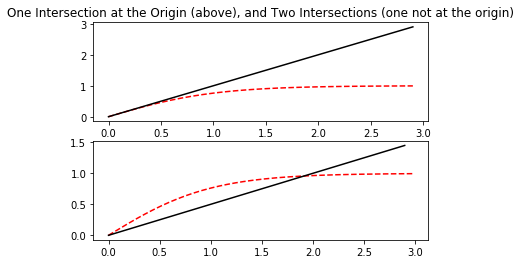

In [3]:
def f(t):
    return np.tanh(t)

t1 = np.arange(0.0, 3.0, 0.1)
t2 = np.arange(0.0, 3.0, 0.02)

plt.figure()
plt.subplot(211)
plt.title('One Intersection at the Origin (above), and Two Intersections (one not at the origin)')
plt.plot(t1, f(t1), 'r--', t1, t1, 'k')
plt.subplot(212)
plt.plot(t2, f(t2), 'r--', t1, 0.5*t1, 'k')
plt.show()

From above one can see that as you change the slope of the left hand side equation, another intersection point will emerge after a critical value for the slope, when it is a tangent to tanh at the origin, or equivalently equal to one. 

When there is a non zero solution to this equation, the properities of the material begin to change, and what is called a phase transition is observed. The temperature at which this phase transition occurs is called the Curie Temperature. 

Using the above logic, we can say that the Curie Temperature will approximately be equal to:

$$T_{c} = 2 z J$$

Throughout this computational report, we will investigate the Curie Temperature of the Ising Model for different geometries, dimensions, temperatures and boundary bonditions. 

## How does the Ising Model behave as a function of time? Can Thermal Equilibrium be acheived?

The Principle of Minimum energy states that the energy of a system at constant temperautre and entropy will reach a minimum when in thermal equilibrium. We invesitgate this principle using the Ising Model. 

To do so, lets first lets create a $100 \times 100$ square lattice and print the lattice before spins are flipped. A yellow point corresponds to the $\sigma = +1$ and a blue box corresponds to $\sigma = -1$. 

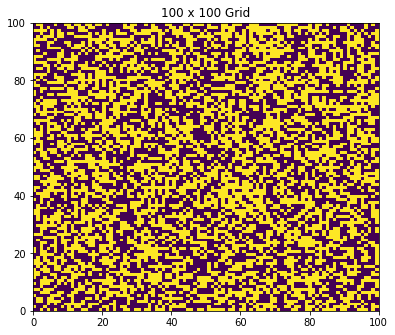

In [76]:
ising_square_100 = IsingModel(dim = 100, pbcs = True, temp = 2, J = [1], h = 0) #Here the square lattice is created.
ising_square_100.grid_figure() #This is the command used to print the grid

Now we will apply the Ising Model, by sweeping through the lattice and updating the spins using the Metropolis Algorithm. 

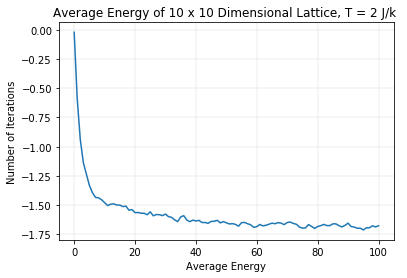

In [77]:
ising_square_100.print_equil(temp = 2, num_its = 100, to_print = 'energy')

Above, we can see that the average energy of the lattice and the average magnetisation approaches a constant as the amount of steps carried out increases. This implies to the lattice being in thermal equilibrium, and correpsonds to the principle of minimin energy, which states that the energy of the system will approach a constant at thermal equilibirum. Reprinting the grid we can see that there are magnetic domains being formed, where the spins are aligned in a certain direction in different areas

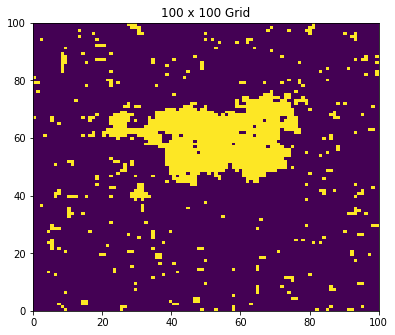

In [10]:
ising_square_100.grid_figure()

Repeating this for a $25 \times 25$ dimensional lattice one can see that this lattice approaches thermal equilibrium in a shorter amount of sweeps. To reduce computational time, a $25 \times 25$ lattice is used for the remainder of the notebook

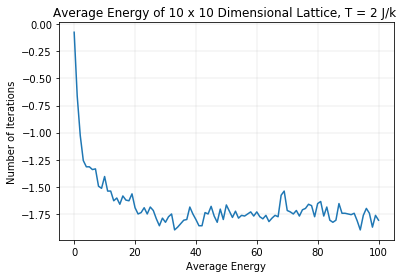

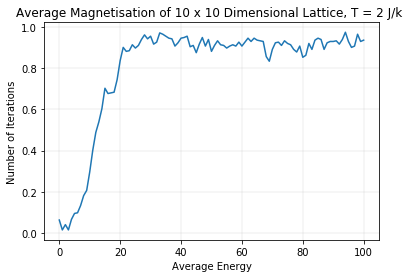

In [11]:
ising_10 = IsingModel(dim = 25, pbcs = True, temp = 2, J = [1], h = 0)
ising_10.print_equil(temp = 2, num_its = 100)

From this we can therefore conclude that the $2D$ Ising Model does reach equilibrium and the principle of minimum exergy is obtained. 

## Phase Transitions for the $2D$ Ising Model

Now I will investigate whether a phase transition occurs in the 2D Ising Model, if so is it a first order or second order phase transition. To do so, I investigate how the average spin per atom, average energy per atom, the heat capacity and magnetic susceptibility vary as the temperature varies

In [169]:
ising_10.props(to_print = 'all') #This function calculates the average properites of the Model over a range of temperature

First, we look at the averagge energy per spin and notice it is similar to the equation obtained for the average energy obtained above. As the temperature decreases, the average energy dramatically changes at a temperature of approximately 2.5 J/k, corresponding to the Curie Temperature. 

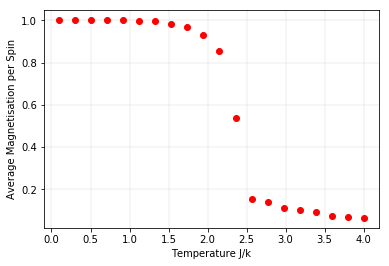

In [12]:
ising_01 = IsingModel(dim = 25, pbcs = True, temp = 0.1, J = [1], h = 0)
ising_01.props(to_print = 'energy', tempmax = 4)

The average spin also resembles the function described above, again giving us a Curie Temperature of approximately 2.5 J/K. From this we can conclude that a phase transition does occur. We compare this to that of the value obtained with Onsager's Exact Solution and pervious literature of 2.5 J/k. 

Our solution is close to, but not equal to the exact solution. This is mainly due to the number of approximations used, such as periodic boundary conditions, mean field theory, which will lead to an increase in error of our results.

We now investigate the average magnetisation per spin of each atom:

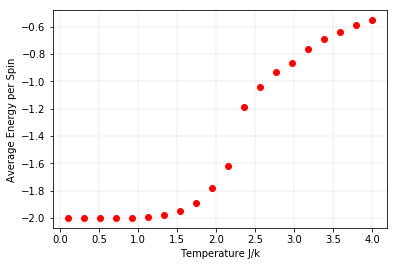

In [15]:
ising_02 = IsingModel(dim = 25, pbcs = True, temp = 0.1, J = [1], h = 0)
ising_02.props(to_print = 'magnetisation', tempmax = 4)

From this graph, one can see that it indeeds resembles the tanh(1/T) graph derived above. We can therefore conclude that the above approximations used when deriving the Curie Temperature gives a correct approximation, and the Curie Temperature obtained is approximately 2.3 J/K.

To determine whether the phase transition is of first or second order, we look at the Heat Capacity and Magnetic Susceptibility, which correspond to the first derivatives of the average spin and average magnetism. 

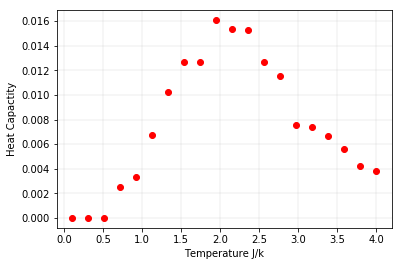

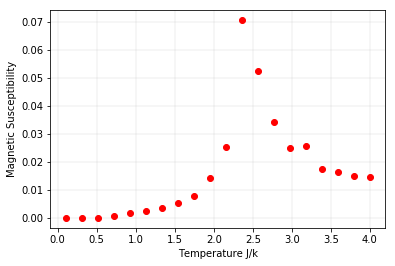

In [16]:
ising_03 = IsingModel(dim = 25, pbcs = True, temp = 0.1, J = [1], h = 0)
ising_03.props(to_print = 'heat capacity')
ising_03.props(to_print = 'magnetic susceptibility')

One can see that these are indeed dicontinuous at the Curie Temperature. Therefore we can conclude that because the energy/magnetism is continous with respect to the temperature, but there first derivatives are discontinous, a second order phase transition is occuring

## The Ising Model under Different Lattice Geometries: The Triangular and Square Lattice of the Ising Model

Now we will investigate how the geometry of the lattice can effect the Curie Temperature of the 2D lattice. To do so, we compare the average magnetisation obtained at various temperature for both the Square and Triangular lattice

The average magnetisation of the traingular lattice for various temperatures is given below

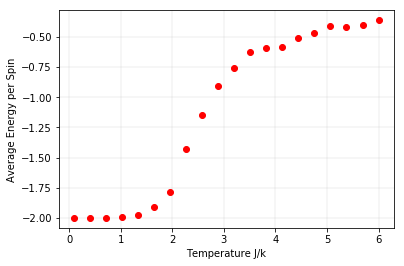

In [320]:
ising_triangular = IsingModel(dim = 10, pbcs = True, temp = 2, J = [1], h = 0)
ising_triangular.props(tempmax= 6, to_print = 'magnetisation')

Here one can see that the traingular lattice also undergoes a phase transition. This is evident from the dramatic change in the average spin per particle at approximately 4.1 J/k, again corresponding to a phase change. Comparing with the value obtained in previous literature (PA Slothe), we observe that this class indeed gives us an accurate solution for the Curie Temperature within an error of 0.2 J/k, as Slothes exact soltution is 4.3 J/k. 

Again the error arises mainly due to the small dimensionality of the lattice, periodic boundary conditions, and the mean field theory applied throughout this computational report.

Comparing the square and triangular lattice, one observes that the Curie Temperature is proportional to the number of nearest neighbours. This is evident from the larger Curie Temperature obtained for the Triangular lattice (it having 6 nearest neighbours), to the square lattice (with four nearest neighbours). 

And also agrees with the approximate formula for the Curie Temperautre derived above, implying that the Curie Temperature is directly proportional to the number of nearest neighbours, or the number of exchange interactions per atom. 

## The Ising Model in Different Dimensions

Next, we compare the Ising Model in one, two and three dimensions. 

The average magnetisation per spin is plotted for the three dimensional lattice below

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


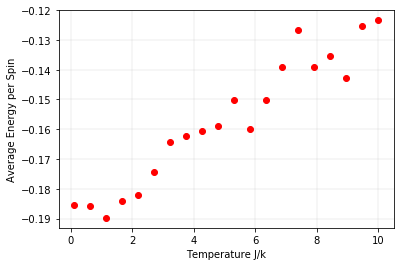

(array([-0.1856 , -0.18594, -0.1898 , -0.18419, -0.18206, -0.17444,
        -0.16427, -0.1622 , -0.16066, -0.1589 , -0.1503 , -0.16001,
        -0.15005, -0.13911, -0.12664, -0.1391 , -0.13555, -0.14268,
        -0.12523, -0.12337]),
 array([0.05   , 0.04949, 0.05225, 0.04253, 0.03902, 0.02823, 0.01989,
        0.01633, 0.01256, 0.01166, 0.00868, 0.00911, 0.00785, 0.00768,
        0.00697, 0.0077 , 0.00681, 0.00712, 0.00671, 0.00644]),
 array([8.18779580e-01, 3.06586696e-02, 1.23549340e-02, 6.34037341e-03,
        4.78036747e-03, 3.31822819e-03, 2.95324307e-03, 2.27380705e-03,
        1.93278751e-03, 1.44204471e-03, 1.40852962e-03, 1.15602651e-03,
        9.51099813e-04, 8.31686535e-04, 6.12396881e-04, 6.07346169e-04,
        5.15455670e-04, 5.61241332e-04, 4.20679528e-04, 3.63893267e-04]),
 array([0.04898979, 0.00867101, 0.00863753, 0.00655295, 0.00530215,
        0.00423353, 0.00335045, 0.00255165, 0.00197971, 0.00171316,
        0.00124535, 0.00108708, 0.00102353, 0.00083949, 0.0006

In [281]:
ising_3D = IsingModel(dim = 10, pbcs = True, temp = 2, grid_type = 'BCC', J = [1], h = 0)
ising_3D.props(tempmax= 10, to_print = 'magnetisation')

From this graph, we can conclude that again, a phase transition occurs for the Three Dimensional lattice, with a Curie Temperature corresponding to approximately 4.2 J/K, which agrees with the value obtained from literature of 4.7 J/k within an error of 0.5 J/k. The reason why the error is the value obtained is high may be due to the small dimensionality of the lattice size used, or because we only considered the first 6 nearest neighbours.

Next we analyse the one dimensional Ising Model

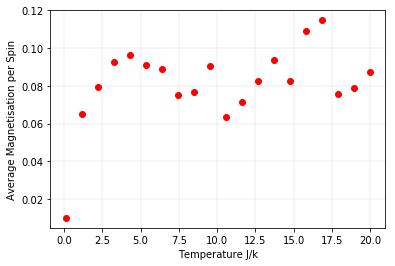

In [92]:
ising_1 = IsingModel(dim = 100, pbcs = True, temp = 0.1, J = [1], h = 0, grid_type = '1D')
ising_1.props( to_print = 'energy', tempmax = 20)

Now plotting the average magnetisation per spin of the one dimensional lattice we obtain, we can conclude that no phase transition occurs, which is seen as the average magnetisation per spin remains constant for a large range in temperatures. The average spin/magnetisation per atom can be seen to fluctuate dramatically between values as is seen above.

From above we can conclude that in order for a phase transition to occur, the dimensionality of the lattice used throughout the Ising Model has to be greater than 2, in order to see a phase transition. 

This contradicts Isings conclusion that no phase transition occurs for any lattice of $n$ dimensions. 

We can also see that as the dimensionality of the lattice increases, the Curie Temperature also increases, again agreeing with the approximate formula derived for the Curie Temperature above. 

## Dependence of the Ising Model on Different Boundary Conditions: Periodic,  Non-Periodic and Cylindrical Boundary Conditions

Next we analysis how good of an approximation we get using periodic boundary conditions on the lattice, which ultimately creates a torus. Doing so, all of the atoms have an equal number of nearest neighbours, and the lattice has no surface

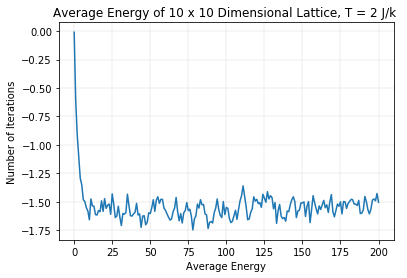

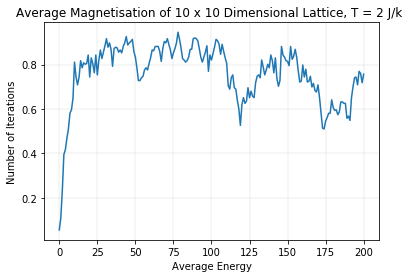

In [325]:
isingq = IsingModel(dim = 25, pbcs = False, temp = 2, Jrule = 'nn')
isingq.print_equil(temp = 2, num_its = 200)

From the average energy vs steps, one can see that without periodic boundary conditions and cylindrical boundary conditions, the lattice still approaches a consant value of approximately -1.5 J and -1.75 J respectively, implying it has reached thermal equilibrium. This value differs to the value obtained for the value obtained with periodic boundary conditions, which was approximately -2 J. This agrees with theory, as the average number of nearest neighbours, which determines the average energy decreases. This implies that the average energy will also decreased, which is observed above. 

We observe from the average magnetisation that it also reached a constant value, however fluctuations are more likely to occur. This is due again to the decrease of nearest neighbours. As we are using the Metropologis Algorithm, the probability of flipping is inversely proportional to the change of energy, therefore the number of nearest neighbours. 

Becuase the surface atoms have less neighbours, they are therefore more likely to flip, which will result in a cascade effect, and leading to large fluctuations in the average magnetisation. 

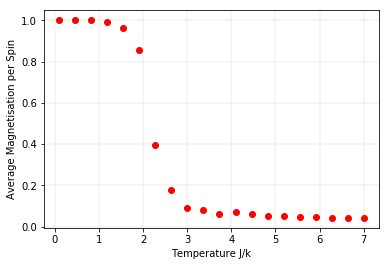

In [326]:
ising_3 = IsingModel(dim = 10, pbcs = True, temp = 0.1, J = [1], h = 0)
m13 = ising_3.props(tempmax = 4)[1]

m3 = ising_3.maglist[0:]

ising_10 = IsingModel(dim = 10, pbcs = False, temp = 0.1, J = [1], h = 0)
m110 = ising_10.props(tempmax = 4)[1]

m10 = ising_10.maglist[0:]

ising_25 = IsingModel(dim = 10, pbcs = 'Cylindrical', temp = 0.1, J = [1], h = 0)
m125 = ising_25.props(tempmax = 4)[1]

m25 = ising_25.maglist[0:]

templist = np.linspace(0.1, 4, 20)

plt.plot(templist[0:], m13[0:], 'ro', label = 'Perioidic')
plt.plot(templist[0:], m110[0:], 'bo', label = 'Non-Periodic')
plt.plot(templist[0:], m125[0:], 'go', label = 'Cylindrical')
plt.legend()
plt.xlabel('Temperature')
plt.ylabel('Magnetisation ')
plt.show()isingq.props(tempmax= 7, to_print = 'energy')

From above, we obtain a Curie Temperature of 2.4 J/k, approximately equal to the Curie Temperature with Boundary Conditions. We have validated our approximation of using periodic boundary conditions when calculating the Curie Temperature and can therefore conclude that using Periodic Boundary Conditions gives us an excellent approximation when determining the Curie Temperature of a material.

## How does an External Magnetic Field effect the Ising Model?

Now we will investigate how an external magnetic field will effect the Ising Model. When h is not equal to zero in equation (1), the intersection with the x axis will shift to the left, resulting in the left and right hand side equations not intersecting at the origin. This will correspond to a different solution for the equation, at which the spins favour aligning in a particular direction, depending on the sign of the external field

To investigate how an external field effects the Curie Temperature or when the material undergoes a phase transition, I plot the average energy per spin for various temperatures below.

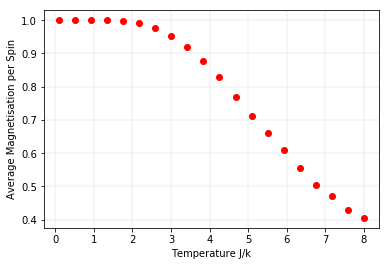

In [4]:
ising_mag = IsingModel(dim = 25, h = 2, J = [1], temp = 0.1)
ising_mag.props(to_print = 'energy', tempmax = 8)

First, one can again see that a phase transition occurs, which is seen as the average magnetisation per spin dramatically changes from one to zero and a phase transition occurs. However, we note that the Curie Temperature has now been shifted to the left, and is now approximately __.

We can explain this using the approximate formula for the average magnetisation per spin described above. We can see that an external field h indeed will shift the tanh(x) function to the left. This is observed above, and we thereofre confirms our approximations are correct. 

One can see above that the Curie Temperature is now ___. 

# How does the distance between nearest neighbours effect the Curie Temperature?

We assume that the interaction between neighbouring atoms is due to the Coulomb force, and therefore the energy depends on the inverse of the distance between them squared. Thus as the distance increases, the interaction energy between each atom decreases. They are thus inversely proportional to one another. 

The interaction energy was therefore varied, in order to determine how the distance effects the Curie Temperature of a ferromagnetic material.


In [ ]:
ising_3 = IsingModel(dim = 10, pbcs = True, temp = 0.1, J = [1], h = 0)
m13 = ising_3.props(tempmax = 20)[1]

m3 = ising_3.maglist[0:]

ising_10 = IsingModel(dim = 10, pbcs = True, temp = 0.1, J = [1], h = 0, Jrule = 'nnn')
m110 = ising_10.props(tempmax = 20)[1]

plt.plot(templist[0:], m13[0:], 'ro', label = 'First NN')
plt.plot(templist[0:], m110[0:], 'bo', label = 'First and Second NN')
plt.xlabel('Temperature J/k')
plt.ylabel('Magnetisation')
plt.legend()
plt.show()

From this graph we can conclude that as the distance (interaction energy) between adjacent lattice sites increases (decreases), the Curie Temperature of the ferromagnetic material decreases.

# Different 3D Geometries: Base Centred Cubic Lattice

To investigate how the geometry of the lattice effects the Curie Temperature of the Ising Model, the average magnetisation of the BCC and square lattice for various temperatures of the three-dimensional Ising Model is plotted below. One can see that the Curie Temperature indeed differs, it being .. for the BCC, and ... for the square lattice.

In [ ]:
ising_bcc = IsingModel(dim = 10, pbcs = True, temp = 1, J = [1], h = 0, Jrule = 'nnn', grid_type = 'BCC')
m13 = ising_bcc.props(tempmax = 20)[1]


ising_bcc2 = IsingModel(dim = 10, pbcs = True, temp = 1, J = [1], h = 0, Jrule = 'nn', grid_type = 'BCC')
m132 = ising_bcc2.props(tempmax = 20)[1]


ising_s = IsingModel(dim = 10, pbcs = True, temp = 1, J = [1], grid_type = '3D', Jrule = 'nn')
m110 = ising_s.props(tempmax = 20)[1]

plt.plot(templist[0:], m13[0:], 'ro', label = 'BCC with NNN')
plt.plot(templist[0:], m132[0:], 'go', label = 'BCC')
plt.plot(templist[0:], m110[0:], 'bo', label = 'Cubic')
plt.xlabel('Temperature J/k')
plt.ylabel('Magnetisation')
plt.legend()
plt.show()

One can conclude from this that when determining the value of the Curie Temperature for various different materials, it is vital that one uses the correct crystal structure of the magnetic material, as it can can change the temperature as much as .., as seen with the.. and the ...

Intuitively this makes sense as the geometry of the structure determines the distance between adjacent neighbours as well as the amount of nearest neighbours, which will affect the Curie Temperature, as seen in the above investigation.

# Dependance on Number of Neighbours

Below, the average magnetisation for various temperatures is plotted for two lattices, each with a different number of neighbours. 

In the second lattice, we also included interactions with next nearest neighbours, taking the distance dependency into account by dividing by $\sqrt(2)$. From the graph below, the Curie Temperature is .., with a difference of ... when compared to the model only using the nearest neighbours. We can see that as one increases the number of lattice sites each site is interacting with the Curie Temperature increases.

In [ ]:
ising_3 = IsingModel(dim = 10, pbcs = True, temp = 0.1, J = [1], h = 0)
m13 = ising_3.props(tempmax = 20)[1]

ising_10 = IsingModel(dim = 10, pbcs = True, temp = 0.1, J = [1], h = 0, Jrule = 'nnn')
m110 = ising_10.props(tempmax = 20)[1]

plt.plot(templist[0:], m13[0:], 'ro', label = 'First NN')
plt.plot(templist[0:], m110[0:], 'bo', label = 'First and Second NN')
plt.xlabel('Temperature J/k')
plt.ylabel('Magnetisation')
plt.legend()
plt.show()

Because each lattice site actually interacts with all other lattice sites in the Ising Model, we can conclude from above, that the value obtained for the Curie Temperature will be smaller than the actual value, due to the approximation that each lattice site only interacts with nearest neighbours. However, due to the interaction energy being inversely proportional to the distance between each atom, we can see that the Curie Temperature obtained provides us with a close approximation to the actual Curie Temperature of the magnetic material. 

Computationally, it would require a large amount of time to calculate all the interactions between each site. However, from above, we can see that using only the nearest neighbours, we can obtain an accurate value for the Curie Temperature, which implies that using only the nearest neighbours provide a good approximation for the Curie Temperature, with next nearest neighbours changing the Curie Temperature only by a fractional amount.